In [ ]:
!pip install "careamics[examples]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.0/203.0 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 102.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00

In [ ]:
!pip install numpy==1.26.4 --force-reinstall
# After running, restart the runtime.


  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
import importlib.util

package_name = "careamics"
spec = importlib.util.find_spec(package_name)

if spec is not None:
    print(f"✅ '{package_name}' is installed.")
else:
    print(f"❌ '{package_name}' is NOT installed.")


✅ 'careamics' is installed.


In [ ]:
#Below codes first test CAREamics with native examples and then use our SWIR images for training and predcition.
from pathlib import Path

import matplotlib.pyplot as plt
import tifffile
import numpy as np
from PIL import Image
from careamics import CAREamist
from careamics.config import create_n2v_configuration
from careamics_portfolio import PortfolioManager

In [ ]:
# instantiate data portfolio manage
portfolio = PortfolioManager()

# and download the data
root_path = Path("./data")
files = portfolio.denoising.N2V_SEM.download(root_path)
print(files)


100%|█████████████████████████████████████| 13.0M/13.0M [00:00<00:00, 16.4GB/s]
Unzipping contents of '/content/data/denoising-N2V_SEM' to '/content/data/denoising-N2V_SEM.unzip'


['/content/data/denoising-N2V_SEM.unzip/SEM/validation.tif', '/content/data/denoising-N2V_SEM.unzip/SEM/train.tif']


In [ ]:
root_path = Path("./data/images")
files = portfolio.denoising.N2V_SEM.download(root_path)
print(files)

100%|█████████████████████████████████████| 13.0M/13.0M [00:00<00:00, 19.7GB/s]
Unzipping contents of '/content/data/images/denoising-N2V_SEM' to '/content/data/images/denoising-N2V_SEM.unzip'


['/content/data/images/denoising-N2V_SEM.unzip/SEM/validation.tif', '/content/data/images/denoising-N2V_SEM.unzip/SEM/train.tif']


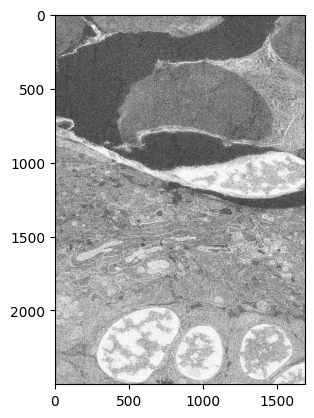

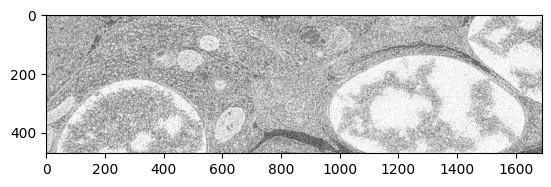

In [ ]:
# portfolio.denoising.N2V_SEM.description
files[0]
plt.imshow(tifffile.imread(files[1]), cmap='gray')
plt.show()
plt.imshow(tifffile.imread(files[0]), cmap='gray')
plt.show()

Text(0.5, 1.0, 'Full Image')

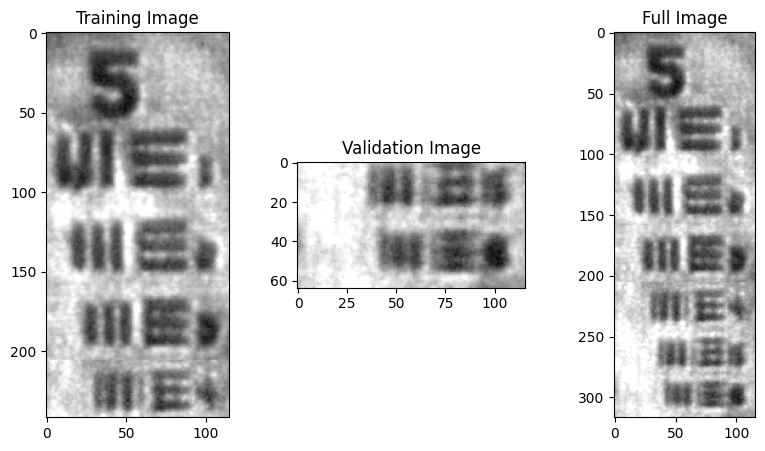

In [ ]:
# load training and validation image and show them side by side
# train_image = tifffile.imread(files[1])
# val_image = tifffile.imread(files[0])

rgb_image = tifffile.imread('/content/drive/MyDrive/ASTAR/Research/USAF n2v/group5.tif')
rgb_image1 = tifffile.imread('/content/drive/MyDrive/ASTAR/Research/USAF n2v/group5_val.tif')
rgb_image2 = tifffile.imread('/content/drive/MyDrive/ASTAR/Research/USAF n2v/group5_full.tif')


# Check if the image has three channels (RGB)
if rgb_image.ndim == 3 and rgb_image.shape[-1] == 3:
    # Convert RGB to grayscale using the luminance formula
    train_image = np.dot(rgb_image[...,:3], [0.2989, 0.5870, 0.1140])
else:
    # If not, assume it's already grayscale
    train_image = rgb_image
    print("dileep")

if rgb_image1.ndim == 3 and rgb_image1.shape[-1] == 3:
    # Convert RGB to grayscale using the luminance formula
    val_image = np.dot(rgb_image1[...,:3], [0.2989, 0.5870, 0.1140])
else:
    # If not, assume it's already grayscale
    val_image = rgb_image1
    print("dileep")

if rgb_image2.ndim == 3 and rgb_image2.shape[-1] == 3:
    # Convert RGB to grayscale using the luminance formula
    train_image1 = np.dot(rgb_image2[...,:3], [0.2989, 0.5870, 0.1140])
else:
    # If not, assume it's already grayscale
    train_image1 = rgb_image2
    print("dileep")

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(train_image, cmap="gray")
ax[0].set_title("Training Image")
ax[1].imshow(val_image, cmap="gray")
ax[1].set_title("Validation Image")
ax[2].imshow(train_image1, cmap="gray")
ax[2].set_title("Full Image")


Text(0.5, 1.0, 'Full Image')

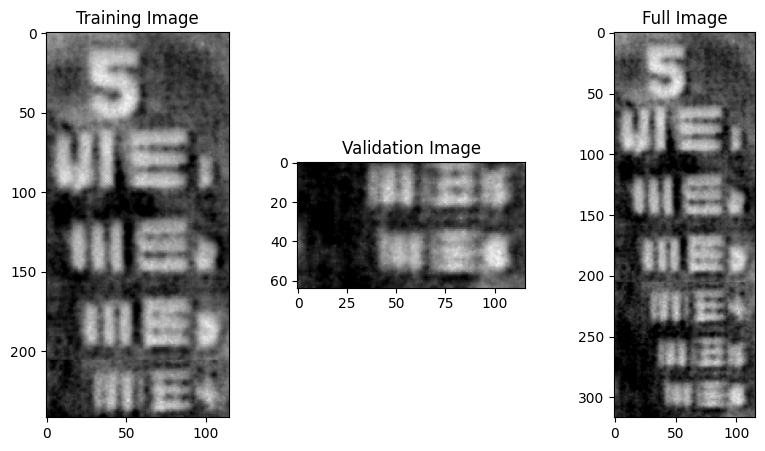

In [ ]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt

# Read images
rgb_image = tifffile.imread('/content/drive/MyDrive/ASTAR/Research/USAF n2v/group5.tif')
rgb_image1 = tifffile.imread('/content/drive/MyDrive/ASTAR/Research/USAF n2v/group5_val.tif')
rgb_image2 = tifffile.imread('/content/drive/MyDrive/ASTAR/Research/USAF n2v/group5_full.tif')

# Check if the image has three channels (RGB)
if rgb_image.ndim == 3 and rgb_image.shape[-1] == 3:
    # Convert RGB to grayscale using the luminance formula
    train_image = np.dot(rgb_image[...,:3], [0.2989, 0.5870, 0.1140])
else:
    # If not, assume it's already grayscale
    train_image = rgb_image
    print("dileep")

if rgb_image1.ndim == 3 and rgb_image1.shape[-1] == 3:
    # Convert RGB to grayscale using the luminance formula
    val_image = np.dot(rgb_image1[...,:3], [0.2989, 0.5870, 0.1140])
else:
    # If not, assume it's already grayscale
    val_image = rgb_image1
    print("dileep")

if rgb_image2.ndim == 3 and rgb_image2.shape[-1] == 3:
    # Convert RGB to grayscale using the luminance formula
    train_image1 = np.dot(rgb_image2[...,:3], [0.2989, 0.5870, 0.1140])
else:
    # If not, assume it's already grayscale
    train_image1 = rgb_image2
    print("dileep")

# Ensure the images are in an 8-bit format (values 0-255)
# If they are not, you might need to rescale appropriately.
train_image_uint8 = train_image.astype(np.uint8)
val_image_uint8 = val_image.astype(np.uint8)
train_image1_uint8 = train_image1.astype(np.uint8)


# Invert the images: pixel value inversion (e.g., 255 becomes 0, 0 becomes 255)
train_image = 255 - train_image_uint8
val_image   = 255 - val_image_uint8
train_image1 = 255 - train_image1_uint8

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(train_image, cmap="gray")
ax[0].set_title("Training Image")
ax[1].imshow(val_image, cmap="gray")
ax[1].set_title("Validation Image")
ax[2].imshow(train_image1, cmap="gray")
ax[2].set_title("Full Image")

In [ ]:
# config = create_n2v_configuration(
#     experiment_name="usaf",
#     data_type="array",
#     axes="YX",
#     patch_size=(64, 64),
#     batch_size=32,
#     num_epochs=500,
#     use_n2v2=False,
# )

# from careamics.config import create_n2v_configuration

# Create your base configuration
config = create_n2v_configuration(
    experiment_name="usaf",
    data_type="array",
    axes="YX",
    patch_size=(64, 64),
    batch_size=256,
    num_epochs=60,  # Use a high number and let early stopping decide when to stop
)

# --- Modify Learning Rate Scheduler ---
# Instead of config.algorithm_config["lr_scheduler"]["parameters"] = {...}
config.algorithm_config.lr_scheduler.parameters = {
    "factor": 0.5,        # reduce LR by half
    "patience": 5,        # wait 5 epochs before reducing LR
    "min_lr": 1e-6,
    "verbose": True,
}

# --- Add weight decay to the optimizer ---
# Instead of config.algorithm_config["optimizer"]["parameters"]["weight_decay"] = 1e-5
config.algorithm_config.optimizer.parameters["weight_decay"] = 1e-5

# --- Add dropout to the UNet model (if supported) ---
# Instead of config.algorithm_config["model"]["dropout"] = 0.2
# config.algorithm_config.model.dropout = 0.2

# --- Set Early Stopping ---
# Instead of setting an early stopping dict in the training_config dict via subscripting,
# config.training_config.early_stopping = {
#     "monitor": "val_loss",
#     "mode": "min",
#     "patience": 10,
#     "verbose": True,
# }

# --- Extend Data Augmentation Transforms ---
# Here, transforms is likely a list, so extend works the same
# config.data_config.transforms.extend([
#     {"name": "RandomBrightnessContrast", "p": 0.5},
#     {"name": "GaussianNoise", "mean": 0, "std": 0.1, "p": 0.5},
# ])

# --- Make validation DataLoader not shuffle (if needed) ---
# config.data_config.val_dataloader_params["shuffle"] = False

# --- Enable verbose progress bar ---
config.training_config.enable_progress_bar = True


print(config)

{'algorithm_config': {'algorithm': 'n2v',
                      'loss': 'n2v',
                      'lr_scheduler': {'name': 'ReduceLROnPlateau',
                                       'parameters': {'factor': 0.5,
                                                      'min_lr': 1e-06,
                                                      'patience': 5,
                                                      'verbose': True}},
                      'model': {'architecture': 'UNet',
                                'conv_dims': 2,
                                'depth': 2,
                                'final_activation': 'None',
                                'in_channels': 1,
                                'independent_channels': True,
                                'n2v2': False,
                                'num_channels_init': 32,
                                'num_classes': 1},
                      'n2v_config': {'masked_pixel_percentage': 0.2,
                           

In [ ]:
# instantiate a CAREamist
careamist = CAREamist(source=config)

# train
careamist.train(
    train_source=val_image,
    val_source=train_image,
)

No working directory provided. Using current working directory: /content.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.11/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/checkpoints exists and is not empty.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type | Params | Mode 
---------------------------------------
0 | model | UNet | 509 K  | train
---------------------------------------
509 K     Trainable params
0         Non-trainable params
509 K     Total params
2.037     Total estimated model params size (MB)
39        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.11/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.11/dist-packages/pytorch_lightning/loops/fit_loop.py:310: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=60` reached.


In [ ]:
# After training
trainer = careamist.trainer  # the internal Lightning trainer

# Extract logged losses
metrics = trainer.logger.experiment.metrics

# If metrics are empty, fall back to the CSV logger
import pandas as pd
df = pd.read_csv(trainer.logger.log_dir + "/metrics.csv")
print(df)




     epoch  step  train_loss_epoch  train_loss_step  val_loss
0        0     0               NaN              NaN  0.973064
1        0     0          1.312208              NaN       NaN
2        1     1               NaN              NaN  1.079321
3        1     1          1.069123              NaN       NaN
4        2     2               NaN              NaN  0.724986
..     ...   ...               ...              ...       ...
116     57    57          0.581524              NaN       NaN
117     58    58               NaN              NaN  0.320148
118     58    58          0.610226              NaN       NaN
119     59    59               NaN              NaN  0.382589
120     59    59          0.560193              NaN       NaN

[121 rows x 5 columns]


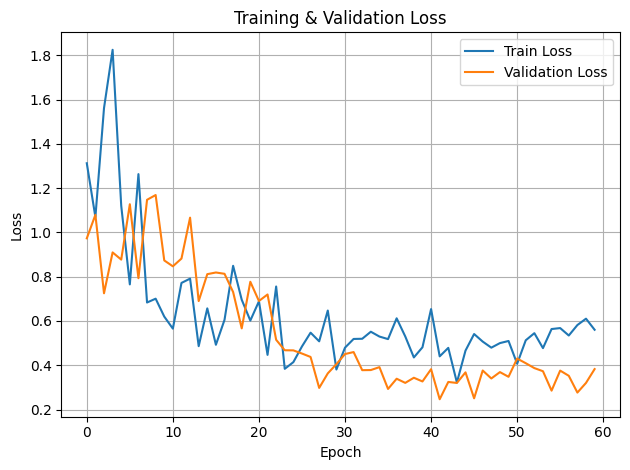

In [ ]:
from pathlib import Path
import pandas as pd

def read_csv_logger_v5(experiment_name: str, log_folder: str) -> dict:
    path = Path(log_folder) / experiment_name
    versions = [int(v.name.split("_")[-1]) for v in path.iterdir() if v.is_dir()]
    version = max(versions)

    csv_path = path / f"version_{version}" / "metrics.csv"
    df = pd.read_csv(csv_path)

    # Drop rows where both train and val are NaN
    df = df.dropna(subset=["train_loss_epoch", "val_loss"], how="all")

    # Extract losses
    train_epochs = df[~df["train_loss_epoch"].isna()]["epoch"].astype(int).values
    val_epochs = df[~df["val_loss"].isna()]["epoch"].astype(int).values
    train_losses = df[~df["train_loss_epoch"].isna()]["train_loss_epoch"].astype(float).values
    val_losses = df[~df["val_loss"].isna()]["val_loss"].astype(float).values

    return {
        "train_epoch": train_epochs,
        "val_epoch": val_epochs,
        "train_loss": train_losses,
        "val_loss": val_losses,
    }

loss_curves = read_csv_logger_v5("usaf", "/content/csv_logs")

import matplotlib.pyplot as plt

plt.plot(loss_curves["train_epoch"], loss_curves["train_loss"], label="Train Loss")
plt.plot(loss_curves["val_epoch"], loss_curves["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# import math
print(train_image.ndim)
print(train_image.shape)
print(val_image.ndim)
print(val_image.shape)
# # Get image dimensions
# image_height, image_width = train_image.shape

# # Calculate tile size to ensure even division
# tile_size = (
#     math.gcd(image_height, 128),  # Find greatest common divisor with 128
#     math.gcd(image_width, 128)   # Find greatest common divisor with 128
# )


# That means:

# Your width is only 116 pixels, which is smaller than the tile width (256).

# So, when Careamics tries to split the image into tiles of 256×256, it hits the border, and one tile ends up with zero width (0) — hence the error:

prediction = careamist.predict(source=train_image1, tile_size=(128,64),tile_overlap=(2,2))
print(prediction[0])
# prediction = careamist.predict(source=train_image, tile_size=(100,100))
# print(prediction)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


2
(242, 115)
2
(64, 116)


/usr/local/lib/python3.11/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Predicting: |          | 0/? [00:00<?, ?it/s]

[[[[161.875   161.32243 161.48132 ... 153.0663  152.57576 153.81046]
   [168.82367 169.1751  168.63647 ... 152.79886 149.99028 151.11234]
   [167.61472 169.07932 164.19455 ... 152.70943 150.4792  152.13771]
   ...
   [152.6365  141.88124 141.62785 ... 150.14095 148.94324 151.08981]
   [154.85588 142.1448  142.23076 ... 149.66837 151.21156 148.31447]
   [153.50436 147.81172 146.86647 ... 150.56392 150.8159  149.33997]]]]


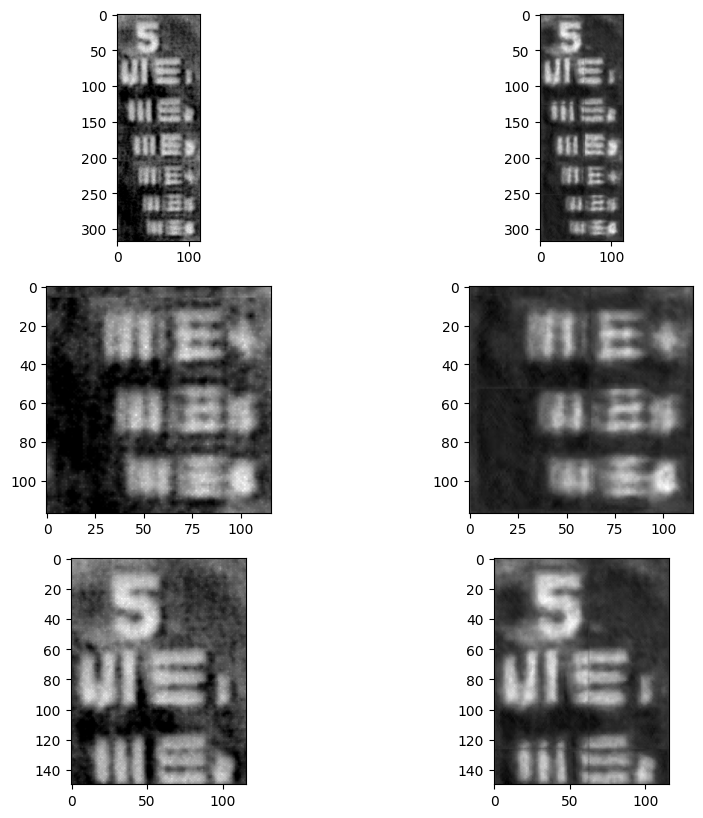

In [ ]:
# Show the full image and crops
x_start, x_end = 00, 150
y_start, y_end = 200, 350

x_start1, x_end1 = 00, 150
y_start1, y_end1 = 0, 150

# train_image =

fig, ax = plt.subplots(3, 2, figsize=(10, 10))
ax[0, 0].imshow(train_image1, cmap="gray")
ax[0, 1].imshow(prediction[0].squeeze(), cmap="gray")
ax[1, 0].imshow(train_image1[y_start:y_end, x_start:x_end], cmap="gray")
ax[1, 1].imshow(prediction[0].squeeze()[y_start:y_end, x_start:x_end], cmap="gray")
ax[2, 0].imshow(train_image1[y_start1:y_end1, x_start1:x_end1], cmap="gray")
ax[2, 1].imshow(prediction[0].squeeze()[y_start1:y_end1, x_start1:x_end1], cmap="gray")

In [ ]:
# Choose a valid 2D crop from within the actual image shape
input_array = train_image[0:128, 0:128]  # assuming train_image is (317, 116)

# Or center crop safely (as small as needed)
from skimage.util import crop

h, w = train_image.shape
crop_size = 64
input_array = train_image[h//2 - crop_size//2:h//2 + crop_size//2,
                          w//2 - crop_size//2:w//2 + crop_size//2]

In [ ]:

general_description = (
    "This model is a UNet trained using the Noise2Void algorithm to denoise "
    "images. The training data consists of crops from an SEM dataset "
    "(T.-O. Buchholz et al., Methods Cell Biol, 2020). The notebook used to "
    "train this model is available on the CAREamics documentation website; "
    "find it at the following link: "
    "https://careamics.github.io/0.1/applications/Noise2Void/SEM/."
)
input_array = input_array.astype("float32")

careamist.export_to_bmz(
    path_to_archive="usaf_epoch60.zip",
    friendly_model_name="usaf_epoch60",
    input_array=input_array,
    authors=[{"name": "CAREamics authors", "affiliation": "Human Technopole"}],
    general_description=general_description,
    data_description=portfolio.denoising.N2V_SEM.description
)


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

computing SHA256 of inputs.npy (result: e4bf4e76892e5fdf5371cc11500eaf25fb3ab3edeb16e2f37c864c447e3a427d): 100%|██████████| 16512/16512 [00:00<00:00, 25870880.71it/s]
computing SHA256 of outputs.npy (result: 2c98364acb861a16ddd668ea14101c90bcb30ca0a5ee0ad6291256ae63376ea0): 100%|██████████| 16512/16512 [00:00<00:00, 20471873.38it/s]
computing SHA256 of environment.yml (result: e3bd86be247e1643656b5bae93733a47296d4de8cf7f4fda363317de6eeebf4d): 100%|██████████| 143/143 [00:00<00:00, 168289.98it/s]
computing SHA256 of weights.pth (result: 6b944a287203b702fae5a2c929978f10fcda6ec5a7799925dcfbd5bbd32a3a49): 100%|██████████| 2066750/2066750 [00:00<00:00, 307004455.02it/s]
computing SHA256 of careamics.yaml (result: 01ed102dc3a396ef5b0d4c39872d4a74b20a8bb3d8cb1d78c1cffc09b4193770): 100%|██████████| 1444/1444 [00:00<00:00, 1567842.34it/s]
2025-04-12 03:49:46.669 | Level 30 | bioimageio.spec.model.v0_5:_validate_documentation:2106 - documentation: No '# Validation' (sub)section found in /root/.c

computing SHA256 of careamics.yaml (result: 01ed102dc3a396ef5b0d4c39872d4a74b20a8bb3d8cb1d78c1cffc09b4193770):   0%|          | 0/1444 [00:00<?, ?it/s]
computing SHA256 of inputs.npy (result: e4bf4e76892e5fdf5371cc11500eaf25fb3ab3edeb16e2f37c864c447e3a427d):   0%|          | 0/16512 [00:00<?, ?it/s]
computing SHA256 of outputs.npy (result: 2c98364acb861a16ddd668ea14101c90bcb30ca0a5ee0ad6291256ae63376ea0):   0%|          | 0/16512 [00:00<?, ?it/s]
computing SHA256 of environment.yml (result: e3bd86be247e1643656b5bae93733a47296d4de8cf7f4fda363317de6eeebf4d):   0%|          | 0/143 [00:00<?, ?it/s]
computing SHA256 of weights.pth (result: 6b944a287203b702fae5a2c929978f10fcda6ec5a7799925dcfbd5bbd32a3a49):   0%|          | 0/2066750 [00:00<?, ?it/s]
/usr/local/lib/python3.11/dist-packages/bioimageio/spec/_internal/io.py:622: UserWarning: Found unzipped /content/drive/MyDrive/ASTAR/Research/USAF n2v/usaf_epoch60_inverse_color.zip.unzip/weights.pth.
  warnings.warn(f"Found unzipped {extracted

Predicting: |          | 0/? [00:00<?, ?it/s]

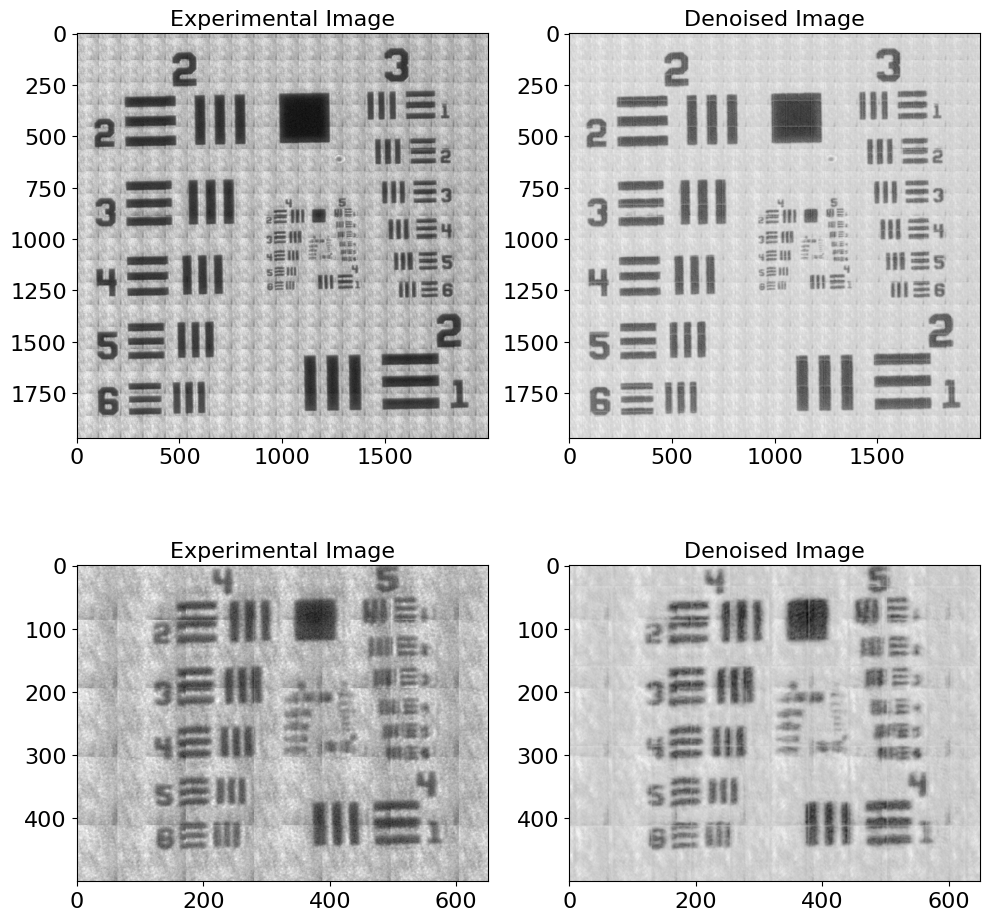

In [ ]:
from careamics.model_io.model_io_utils import load_pretrained

# Load the model and unpack the tuple
# print(config)
loaded_model, config = load_pretrained("/content/drive/MyDrive/ASTAR/Research/USAF n2v/usaf_epoch60_inverse_color.zip")
careamist = CAREamist(source=config)
careamist.model = loaded_model
careamist.model.eval()

# Read images
rgb_image = tifffile.imread('/content/drive/MyDrive/ASTAR/Research/USAF n2v/group5.tif')
rgb_image1 = tifffile.imread('/content/drive/MyDrive/ASTAR/Research/USAF n2v/group5_val.tif')
rgb_image22 = tifffile.imread('/content/drive/MyDrive/ASTAR/Research/USAF n2v/group5_full.tif')
rgb_image3 = tifffile.imread('/content/drive/MyDrive/ASTAR/Research/USAF n2v/big image.tif')


# Check if the image has three channels (RGB)

# Check if the image has three channels (RGB)
if rgb_image.ndim == 3 and rgb_image.shape[-1] == 3:
    # Convert RGB to grayscale using the luminance formula
    train_image = np.dot(rgb_image[...,:3], [0.2989, 0.5870, 0.1140])
else:
    # If not, assume it's already grayscale
    train_image = rgb_image
    print("dileep")

if rgb_image1.ndim == 3 and rgb_image1.shape[-1] == 3:
    # Convert RGB to grayscale using the luminance formula
    val_image = np.dot(rgb_image1[...,:3], [0.2989, 0.5870, 0.1140])
else:
    # If not, assume it's already grayscale
    val_image = rgb_image1
    print("dileep")

if rgb_image22.ndim == 3 and rgb_image22.shape[-1] == 3:
    # Convert RGB to grayscale using the luminance formula
    train_image11 = np.dot(rgb_image22[...,:3], [0.2989, 0.5870, 0.1140])
else:
    # If not, assume it's already grayscale
    train_image22 = rgb_image22
    print("dileep")


if rgb_image3.ndim == 3 and rgb_image3.shape[-1] == 3:
    # Convert RGB to grayscale using the luminance formula
    train_image3 = np.dot(rgb_image3[...,:3], [0.2989, 0.5870, 0.1140])
else:
    # If not, assume it's already grayscale
    train_image3 = rgb_image3
    print("dileep")

# Create a CAREamist instance using the configuration
# careamist = CAREamist(source=config)
# Now use the model for inference

#inverse bits
train_image11_uint8 = train_image11.astype(np.uint8)

train_image3_uint8 = train_image3.astype(np.uint8)


# Invert the images: pixel value inversion (e.g., 255 becomes 0, 0 becomes 255)

train_image11 = 255 - train_image11_uint8
train_image3 = 255 - train_image3_uint8

# train_image11 =  train_image11_uint8-255



prediction1 = careamist.predict(source=train_image3, tile_size=(128,64),tile_overlap=(2,2))
# Show the full image and crops
x_start1, x_end1 = 00, 2000
y_start1, y_end1 = 300, 2500

x_start, x_end = 800, 1450
y_start, y_end = 1100, 1600


#inverse grayscales of images to get actual images
prediction1[0] = 255 - prediction1[0]

# fig, ax = plt.subplots(2, 2, figsize=(10, 10))
# ax[0, 0].imshow(train_image3_uint8.squeeze()[y_start1:y_end1, x_start1:x_end1], cmap="gray")
# ax[0,0].set_title("Experimental Image")
# ax[0, 1].imshow(prediction1[0].squeeze()[y_start1:y_end1, x_start1:x_end1], cmap="gray")
# ax[0,1].set_title("Denoised Image")
# ax[1, 0].imshow(train_image3_uint8[y_start:y_end, x_start:x_end], cmap="gray")
# ax[1,0].set_title("Experimental Image")
# ax[1, 1].imshow(prediction1[0].squeeze()[y_start:y_end, x_start:x_end], cmap="gray")
# ax[1,1].set_title("Denoised Image")

fs = 16

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Top-left: Experimental crop 1
img0 = train_image3_uint8.squeeze()[y_start1:y_end1, x_start1:x_end1]
ax[0, 0].imshow(img0, cmap="gray")
ax[0, 0].set_title("Experimental Image", fontsize=fs)

# Top-right: Denoised crop 1
img1 = prediction1[0].squeeze()[y_start1:y_end1, x_start1:x_end1]
ax[0, 1].imshow(img1, cmap="gray")
ax[0, 1].set_title("Denoised Image", fontsize=fs)

# Bottom-left: Experimental crop 2
img2 = train_image3_uint8[y_start:y_end, x_start:x_end]
ax[1, 0].imshow(img2, cmap="gray")
ax[1, 0].set_title("Experimental Image", fontsize=fs)

# Bottom-right: Denoised crop 2
img3 = prediction1[0].squeeze()[y_start:y_end, x_start:x_end]
ax[1, 1].imshow(img3, cmap="gray")
ax[1, 1].set_title("Denoised Image", fontsize=fs)

# Increase tick label size for all subplots
for row in range(2):
    for col in range(2):
        ax[row, col].tick_params(axis="both", labelsize=fs)

plt.tight_layout()
plt.show()

In [ ]:
!pip install PyWavelets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 79.9 MB/s eta 0:00:00


In [ ]:
from skimage.restoration import estimate_sigma

# Ensure images are in a consistent format (e.g., uint8 or float in a given range)
# Here we assume train_image3_uint8 and the denoised prediction (inverted if needed) are uint8.
noisy = train_image3_uint8
denoised = prediction1[0].squeeze()  # may need to convert to the same dtype if not already

# If needed, convert denoised result to uint8:
denoised_uint8 = denoised.astype(np.uint8)

# from skimage.restoration import estimate_sigma

# Assuming 'noisy' and 'denoised_uint8' are your grayscale images
sigma_noisy = estimate_sigma(noisy, channel_axis=None)
sigma_denoised = estimate_sigma(denoised_uint8, channel_axis=None)

print(f"Estimated noise level before denoising: {sigma_noisy:.2f}")
print(f"Estimated noise level after denoising: {sigma_denoised:.2f}")


Estimated noise level before denoising: 2.69
Estimated noise level after denoising: 1.36


In [ ]:
import numpy as np

# Compute residual: difference between noisy and denoised images.
residual = noisy.astype(np.int16) - denoised_uint8.astype(np.int16)
residual_std = np.std(residual)

print(f"Residual standard deviation: {residual_std:.2f}")


Residual standard deviation: 8.07
